**Dividing Data Into Training and Testing**

<ipython-input-13-4550505c47d2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Log_{col}'] = np.log(train_data[col]+1)
<ipython-input-13-4550505c47d2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'Log_{col}'] = np.log(test_data[col]+1)
<ipython-input-13-4550505c47d2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Model for Value:
R-squared: 0.9453
Adjusted R-squared: 0.9431
RMSE: 6092.8967

AIC is: -3.6497579496171824
BIC is: -1.0580842176085241


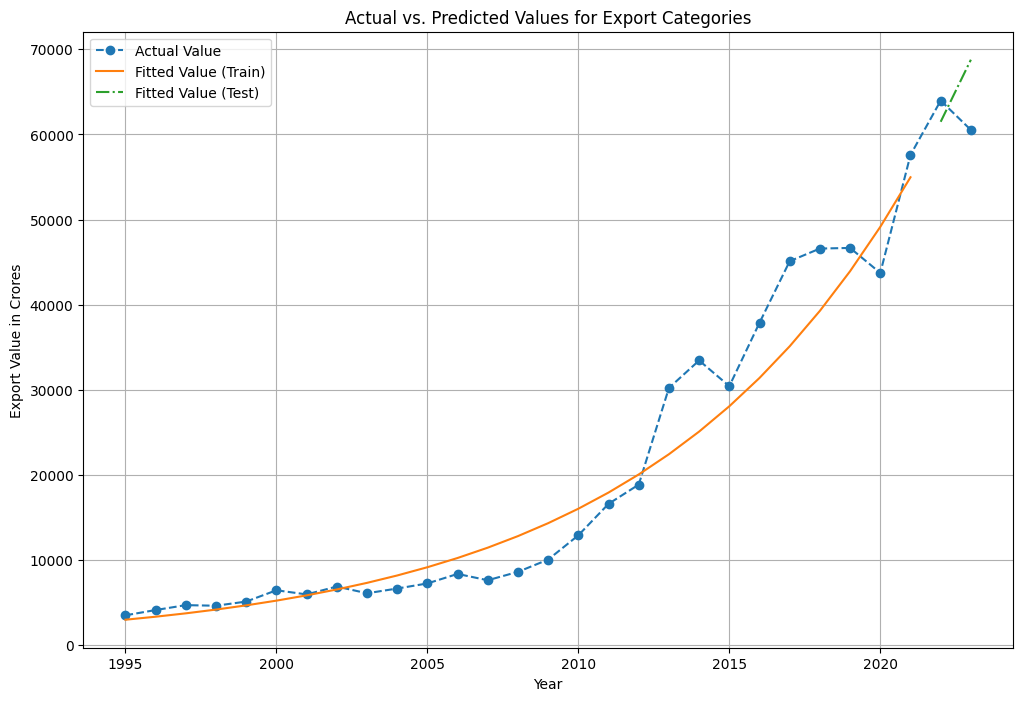

      Forecast_Value
Item                
2022    61484.063807
2023    68774.415805


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
years = np.arange(1995, 2024)
data={
    'Item':[0]*29,
    'Value':[3501.11, 4121.36, 4697.48, 4626.86, 5116.67, 6443.89, 5957.05, 6881.31, 6091.95, 6646.69, 7245.30, 8363.53, 7620.92, 8607.94, 10048.53, 12901.47, 16597.23, 18856.26, 30213.26, 33441.61, 30420.83, 37870.90, 45106.89, 46589.37, 46662.85, 43720.98, 57586.48, 63969.14, 60523.89]
}

data = pd.DataFrame(data)
data['Item'] = years
data['Item'] = data['Item'].astype(int)

train_size = 27
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

forecast_years = np.arange(2022,2024)
forecast_data = pd.DataFrame({'Item': forecast_years})

for col in ['Value']:

    train_data[f'Log_{col}'] = np.log(train_data[col]+1)
    test_data[f'Log_{col}'] = np.log(test_data[col]+1)
    X_train = sm.add_constant(train_data['Item'])
    y_train = train_data[f'Log_{col}']
    model = sm.OLS(y_train, X_train).fit()

    train_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(train_data['Item'])))-1
    test_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(test_data['Item'])) )-1
    r_squared = model.rsquared
    n=len(train_data)
    p=1
    rmse = np.sqrt(mean_squared_error(test_data[col], test_data[f'Fitted_{col}']))
    adjusted_rsquared=1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    print(f'Model for {col}:')
    print(f'R-squared: {r_squared:.4f}')
    print(f'Adjusted R-squared: {adjusted_rsquared:.4f}')
    print(f'RMSE: {rmse:.4f}\n')
    print("AIC is:",model.aic)
    print("BIC is:",model.bic)
    forecast_data[f'Forecast_{col}'] = model.predict(sm.add_constant(forecast_data['Item']))
    forecast_data[f'Forecast_{col}'] = np.exp(forecast_data[f'Forecast_{col}'])-1

plt.figure(figsize=(12, 8))

for col in ['Value']:
    plt.plot(data['Item'], data[col], label=f'Actual {col}', marker='o', linestyle='--')
    plt.plot(train_data['Item'], train_data[f'Fitted_{col}'], label=f'Fitted {col} (Train)', linestyle='-')
    plt.plot(test_data['Item'], test_data[f'Fitted_{col}'], label=f'Fitted {col} (Test)', linestyle='-.')

plt.title('Actual vs. Predicted Values for Export Categories')
plt.xlabel('Year')
plt.ylabel('Export Value in Crores')
plt.legend()
plt.grid(True)
plt.show()
forecast_data.set_index('Item', inplace=True)
print(forecast_data)



**Using the Entire Data for Training and Testing**

<ipython-input-14-923a752f1538>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Log_{col}'] = np.log(train_data[col]+1)
<ipython-input-14-923a752f1538>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(train_data['Item'])))-1


Model for Value:
R-squared: 0.9543
Adjusted R-squared: 0.9526
RMSE: 4304.0379

AIC is: -5.881650279119803
BIC is: -3.147058619146855


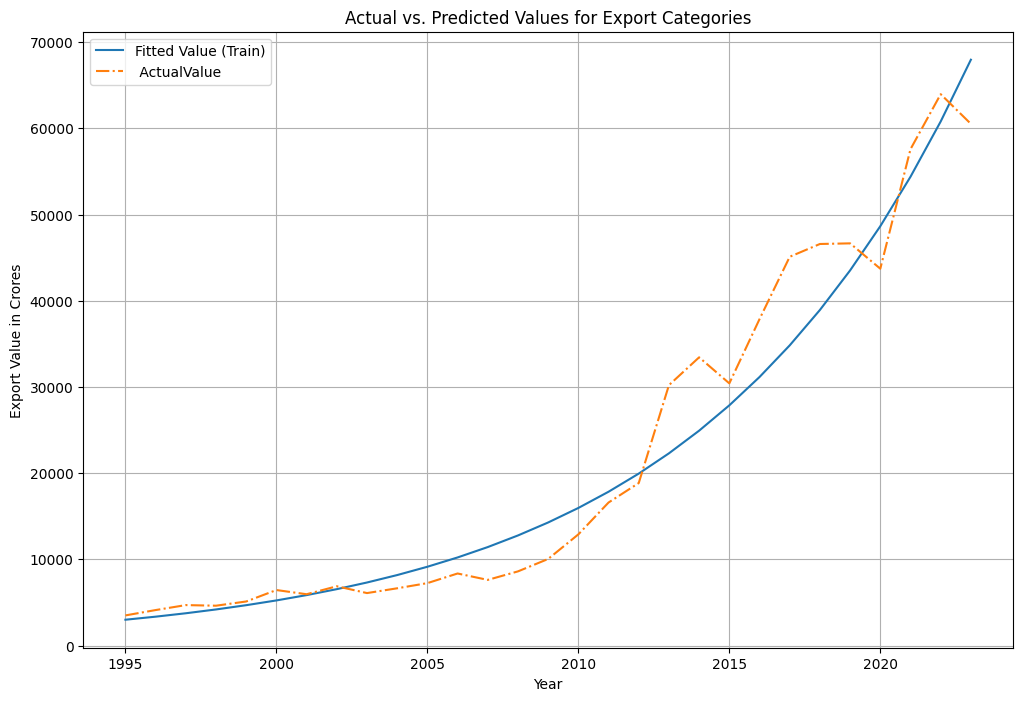

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pickle
years = np.arange(1995, 2024)
data={
    'Item':[0]*29,
    'Value':[3501.11, 4121.36, 4697.48, 4626.86, 5116.67, 6443.89, 5957.05, 6881.31, 6091.95, 6646.69, 7245.30, 8363.53, 7620.92, 8607.94, 10048.53, 12901.47, 16597.23, 18856.26, 30213.26, 33441.61, 30420.83, 37870.90, 45106.89, 46589.37, 46662.85, 43720.98, 57586.48, 63969.14, 60523.89]
}

data = pd.DataFrame(data)
data['Item'] = years
data['Item'] = data['Item'].astype(int)

train_size = 29
train_data = data.iloc[:train_size]

for col in ['Value']:

    train_data[f'Log_{col}'] = np.log(train_data[col]+1)
    X_train = sm.add_constant(train_data['Item'])
    y_train = train_data[f'Log_{col}']
    model = sm.OLS(y_train, X_train).fit()

    train_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(train_data['Item'])))-1
    r_squared = model.rsquared
    n=len(train_data)
    p=1
    rmse = np.sqrt(mean_squared_error(train_data[col], train_data[f'Fitted_{col}']))
    adjusted_rsquared=1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    print(f'Model for {col}:')
    print(f'R-squared: {r_squared:.4f}')
    print(f'Adjusted R-squared: {adjusted_rsquared:.4f}')
    print(f'RMSE: {rmse:.4f}\n')
    print("AIC is:",model.aic)
    print("BIC is:",model.bic)


plt.figure(figsize=(12, 8))

for col in ['Value']:
    plt.plot(train_data['Item'], train_data[f'Fitted_{col}'], label=f'Fitted {col} (Train)', linestyle='-')
    plt.plot(train_data['Item'], train_data[f'{col}'], label=f' Actual{col}', linestyle='-.')

plt.title('Actual vs. Predicted Values for Export Categories')
plt.xlabel('Year')
plt.ylabel('Export Value in Crores')
plt.legend()
plt.grid(True)
plt.show()
with open('linear_regression_model.pkl', 'wb') as file:
  pickle.dump(model, file)


**Function to be used for Deployment**

In [15]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
def prediction(x):
  if(x<2026 or x>2030):
    return " Please stick to the range"
  with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
  forecast_data = pd.DataFrame({'Item': np.arange(2024, x+1)})
  forecast_const = sm.add_constant(forecast_data['Item'])
  forecast_data['Value'] = np.exp(loaded_model.predict(forecast_const)) - 1
  print("Predictions using loaded model in Crores:")
  print(forecast_data)
  years = np.arange(1995, 2024)
  data = pd.DataFrame({
     'Item': years,
     'Value': [3501.11, 4121.36, 4697.48, 4626.86, 5116.67, 6443.89, 5957.05, 6881.31, 6091.95, 6646.69, 7245.30, 8363.53, 7620.92, 8607.94, 10048.53, 12901.47, 16597.23, 18856.26, 30213.26, 33441.61, 30420.83, 37870.90, 45106.89, 46589.37, 46662.85, 43720.98, 57586.48, 63969.14, 60523.89]})
  plt.plot(data['Item'],data['Value'],marker="o",linestyle="--",label="Trend from 1995 to 2023")
  plt.plot(forecast_data['Item'],forecast_data['Value'],linestyle="-",label="Forecast value from 2024 till {}".format(x))
  plt.title('Actual vs. Predicted Values for Export Categories')
  plt.xlim(1995,2030)
  plt.xlabel('Year')
  plt.ylabel('Export Value in Crores')
  plt.legend()
  plt.show()

Enter a year in the range 2026-2030:2026
Predictions using loaded model in Crores:
   Item         Value
0  2024  75977.038795
1  2025  84932.519209
2  2026  94943.576087


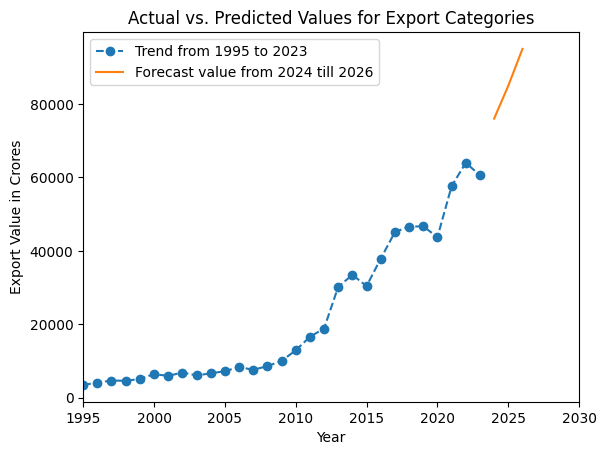

In [16]:
 x=int(input("Enter a year in the range 2026-2030:"))
 prediction(x)